___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, stats, skew
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve, roc_auc_score, roc_curve
from sklearn.utils import class_weight
import pickle

In [55]:
tf.__version__

'2.9.1'

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
pd.concat([df.head(), df.sample(5), df.tail()])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6597,6598,15637774,Fraser,558,France,Male,32,5,73494.21,1,0,0,136301.10,0
1984,1985,15737605,Morris,531,Spain,Female,45,1,126495.57,2,1,1,164741.50,0
5546,5547,15633818,McMillan,786,France,Male,32,9,0.00,2,1,0,133112.41,0
3214,3215,15667417,Tao,572,France,Male,33,9,68193.72,1,1,0,19998.31,0
9160,9161,15753679,Mullawirraburka,778,France,Male,24,4,0.00,2,1,1,162809.20,0


In [4]:
df.drop(columns = ["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [6]:
df.describe(include = "O").T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [7]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum().sum()

0

In [10]:
df[df["Balance"] == 0].shape[0]/df.shape[0]

0.3617

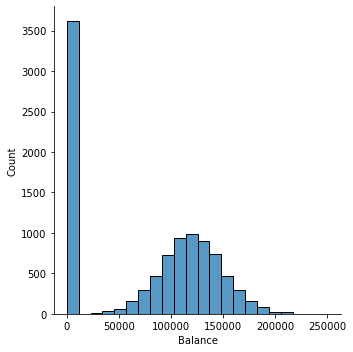

In [11]:
sns.displot(data = df, x = "Balance");

In [12]:
df["Balance"].value_counts(bins = 5)

(100359.236, 150538.854]    3828
(-250.899, 50179.618]       3692
(50179.618, 100359.236]     1533
(150538.854, 200718.472]     915
(200718.472, 250898.09]       32
Name: Balance, dtype: int64

In [13]:
df["Balance"].value_counts(bins = [-1, 0, 100000, 150000, df["Balance"].max()]).sort_index(ascending=True)

(-1.001, 0.0]            3617
(0.0, 100000.0]          1584
(100000.0, 150000.0]     3830
(150000.0, 250898.09]     969
Name: Balance, dtype: int64

In [14]:
conditions_balance = [
    (df["Balance"] == 0), 
    (df["Balance"]>0) & (df["Balance"] < 100000), 
    (df["Balance"] >= 100000) & (df["Balance"] < 150000), 
    (df["Balance"] >= 150000)
]
values_balance = ["zero", "low", "medium", "high"]

In [15]:
df["Balance_cat"] = np.select(conditions_balance, values_balance)
df[["Balance", "Balance_cat"]]

,Balance,Balance_cat
0,0.00,zero
1,83807.86,low
2,159660.80,high
3,0.00,zero
4,125510.82,medium
...,...,...
9995,0.00,zero
9996,57369.61,low
9997,0.00,zero
9998,75075.31,low


In [16]:
df["Balance_cat"].value_counts()

medium    3830
zero      3617
low       1584
high       969
Name: Balance_cat, dtype: int64

In [17]:
continuous_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

In [18]:
df[continuous_features].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


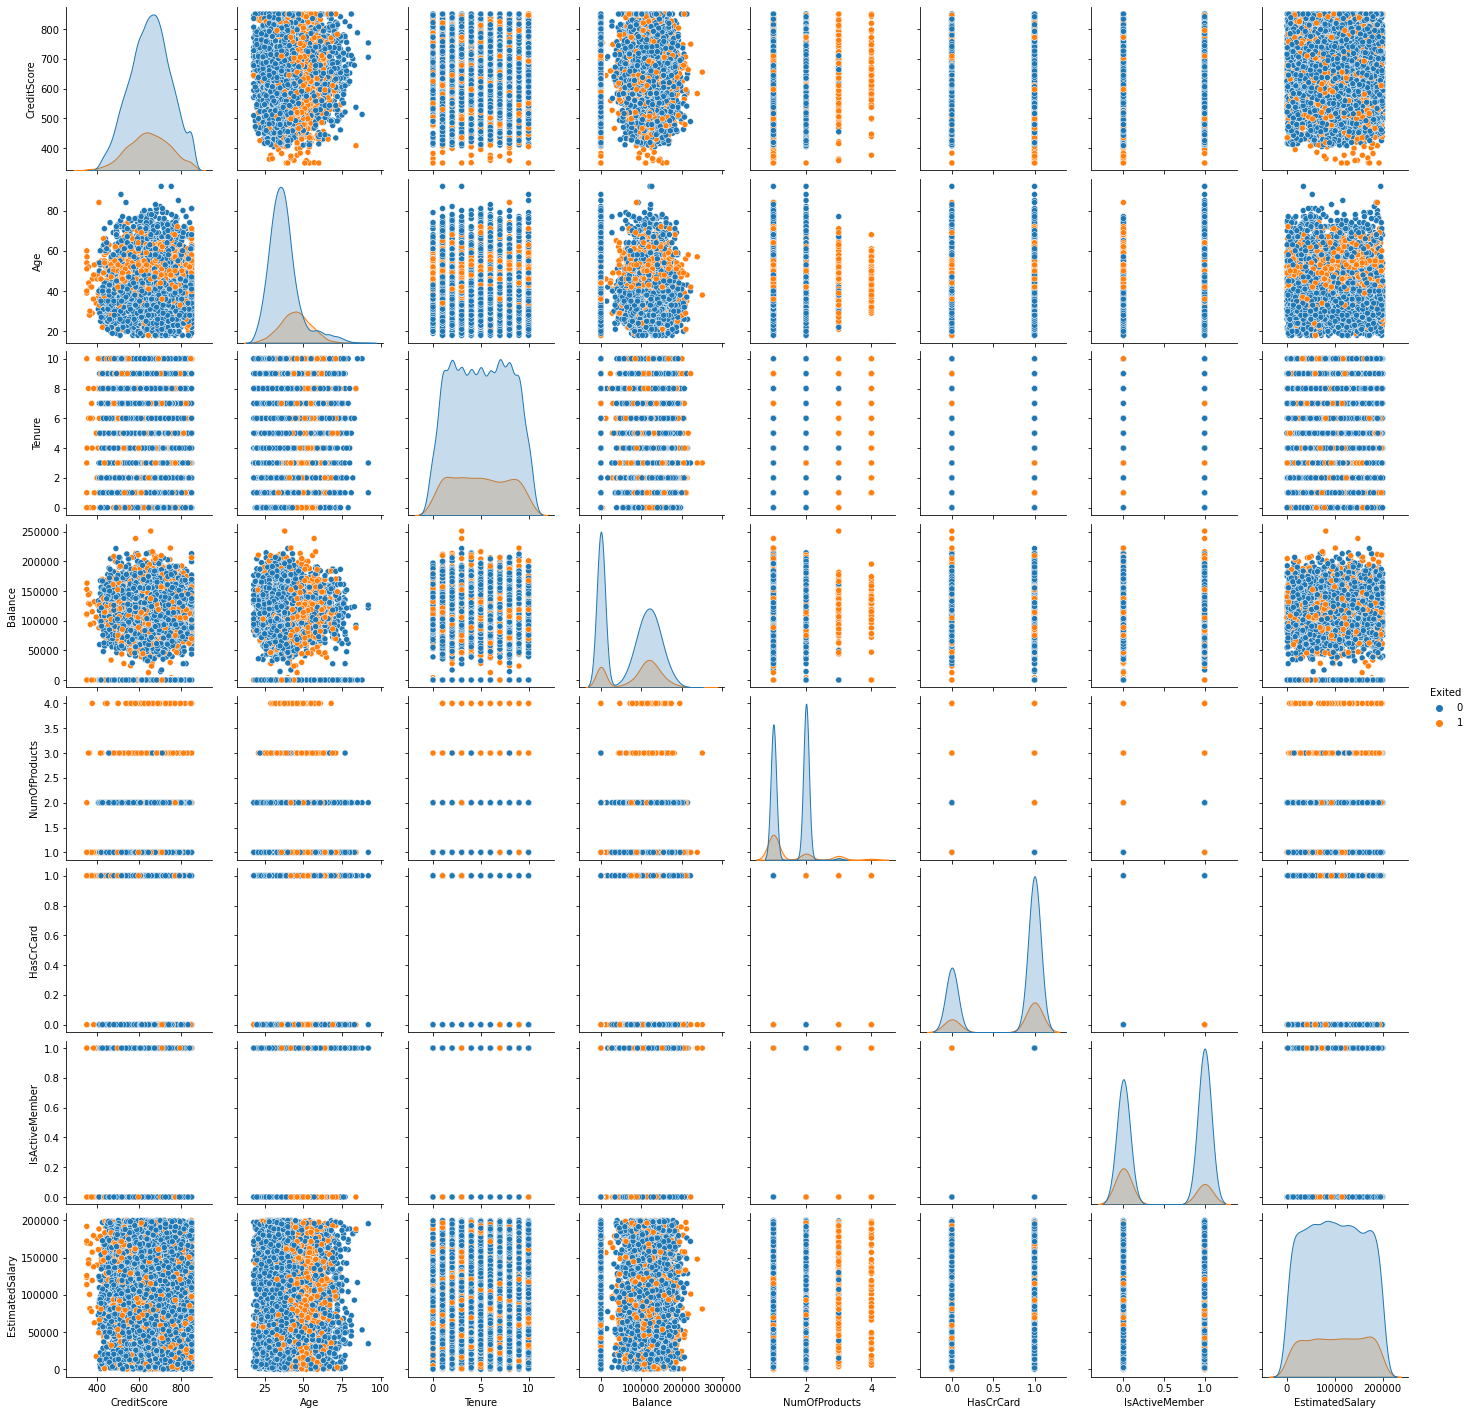

In [19]:
sns.pairplot(df,hue='Exited');

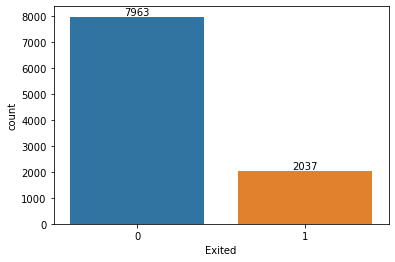

In [20]:
ax = sns.countplot(data = df, x = "Exited")
ax.bar_label(ax.containers[0]);

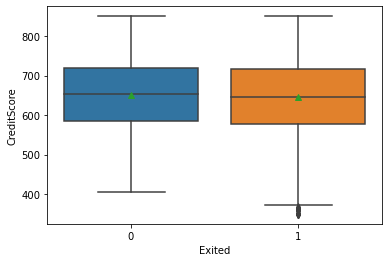

In [21]:
sns.boxplot(x='Exited',y='CreditScore',data=df, showmeans=True);

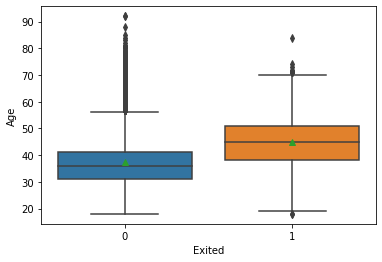

In [22]:
sns.boxplot(x='Exited',y='Age',data=df, showmeans=True);

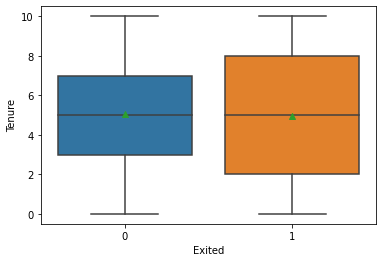

In [23]:
sns.boxplot(x='Exited',y='Tenure',data=df, showmeans=True);

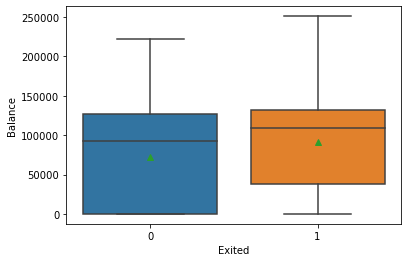

In [24]:
sns.boxplot(x='Exited',y='Balance',data=df, showmeans=True);

In [25]:
pd.crosstab(df["Balance_cat"], df["Exited"], normalize = "columns")

Exited,0,1
Balance_cat,,
high,0.093558,0.109966
low,0.157981,0.160039
medium,0.357026,0.484536
zero,0.391435,0.245459


In [26]:
contigency = pd.crosstab(df["Balance_cat"], df["Exited"])
c, p, dof, expected = chi2_contingency(contigency)
p

2.1231970253773323e-36

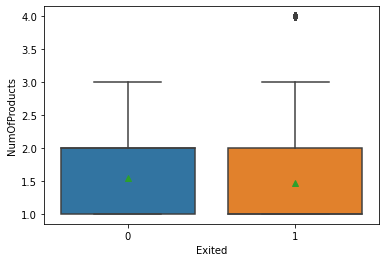

In [27]:
sns.boxplot(x='Exited',y='NumOfProducts',data=df, showmeans=True);

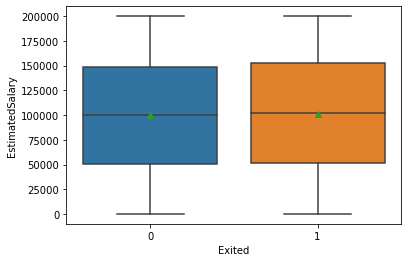

In [28]:
sns.boxplot(x='Exited',y='EstimatedSalary',data=df, showmeans=True);

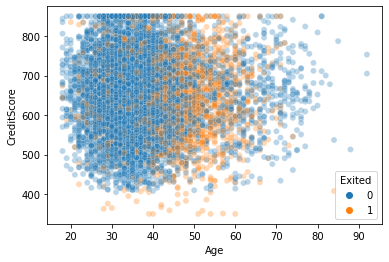

In [29]:
sns.scatterplot(x='Age', y='CreditScore', data=df, hue='Exited', alpha=0.3);

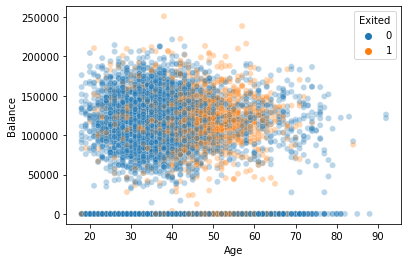

In [30]:
sns.scatterplot(x='Age', y='Balance', data=df, hue='Exited', alpha=0.3);

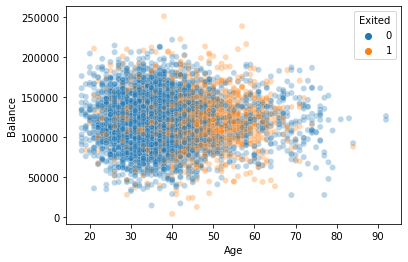

In [31]:
sns.scatterplot(x='Age', y='Balance', data=df[df["Balance"]!=0], hue='Exited', alpha=0.3);

In [32]:
cat_features = ["Gender", "Geography", "HasCrCard", "IsActiveMember"]

In [33]:
for col in df[cat_features]:
    contigency = pd.crosstab(df[col], df["Exited"])
    c, p, dof, expected = chi2_contingency(contigency)
    print(pd.DataFrame(pd.crosstab(df[col], df["Exited"], normalize = "columns")))
    print("\n")
    print(f"chi2 test result:{p}")
    print("\n\n")

Exited         0         1
Gender                    
Female  0.427477  0.559156
Male    0.572523  0.440844


chi2 test result:2.2482100097131755e-26



Exited            0         1
Geography                    
France     0.527942  0.397644
Germany    0.212859  0.399607
Spain      0.259199  0.202749


chi2 test result:3.8303176053541544e-66



Exited            0         1
HasCrCard                    
0          0.292854  0.300933
1          0.707146  0.699067


chi2 test result:0.49237236141554686



Exited                 0         1
IsActiveMember                    
0               0.445435  0.639175
1               0.554565  0.360825


chi2 test result:8.785858269303703e-55





In [34]:
important_features1 = ["Gender", "Geography", "IsActiveMember", "Age", "Balance"]
important_features2 = ["Gender", "Geography", "IsActiveMember", "Balance_cat", "Age"]

In [35]:
X1 = df[important_features1]
X2 = df[important_features2]
y = df["Exited"]

# Preprocessing of Data
- Train | Test Split, Scalling

In [36]:
seed = 42
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = seed)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = seed)

In [37]:
cat_one_hot1 = important_features1[0:3]
cat_one_hot2 = important_features2[0:4]
column_trans1 = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_one_hot1), remainder=StandardScaler())
column_trans2 = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_one_hot2), remainder=StandardScaler())

In [38]:
column_trans1.fit(X1_train)
column_trans2.fit(X2_train)
X1_train = column_trans1.transform(X1_train)
X1_test = column_trans1.transform(X1_test)
X2_train = column_trans2.transform(X2_train)
X2_test = column_trans2.transform(X2_test)

In [39]:
X1_train.shape

(7000, 9)

In [40]:
X2_train.shape

(7000, 12)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [124]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(int(X1_train.shape[1]*1.5), activation = 'relu', input_dim = X1_train.shape[1]))
model.add(Dense(int(X1_train.shape[1]*1.5), activation = 'relu'))
model.add(Dense(X1_train.shape[1], activation = 'relu'))
model.add(Dense(int(X1_train.shape[1]*0.5), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 13)                130       
                                                                 
 dense_16 (Dense)            (None, 13)                182       
                                                                 
 dense_17 (Dense)            (None, 9)                 126       
                                                                 
 dense_18 (Dense)            (None, 4)                 40        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [42]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(9, 13) dtype=float32, numpy=
 array([[ 0.17187953, -0.06161642, -0.1536592 , -0.03709677, -0.4870758 ,
          0.19288397,  0.25079447,  0.3890056 , -0.2858428 , -0.28911144,
         -0.19804317,  0.2322222 , -0.3831235 ],
        [ 0.05020106,  0.07792634,  0.41745573, -0.5123485 ,  0.02217472,
          0.14052713, -0.31404132,  0.2396239 ,  0.0478726 , -0.40988442,
          0.18456346,  0.1674031 , -0.17029974],
        [ 0.10592729, -0.3022415 ,  0.36842197, -0.06201857,  0.46847177,
         -0.2741452 ,  0.32565713,  0.02751064, -0.00594509, -0.29649413,
          0.36109245,  0.38842028, -0.20013407],
        [ 0.1951102 , -0.27402568,  0.29424983,  0.4879101 , -0.45047644,
          0.31202316,  0.16741443,  0.09102654, -0.35029617,  0.24868977,
         -0.18743941,  0.11216509, -0.03631112],
        [ 0.49929172,  0.2321999 , -0.18437907,  0.34025913, -0.00241113,
         -0.31873262,  0.27038586, -0.16915709, -0.2284449 , -0.1930844

In [125]:
model.fit(x = X1_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

Epoch 1/1000
47/47 [==============================] - 1s 5ms/step - loss: 0.7035 - accuracy: 0.5224 - val_loss: 0.6289 - val_accuracy: 0.7981
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7914 - val_loss: 0.4824 - val_accuracy: 0.7981
Epoch 3/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7916 - val_loss: 0.4296 - val_accuracy: 0.8029
Epoch 4/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8037 - val_loss: 0.4181 - val_accuracy: 0.8267
Epoch 5/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8165 - val_loss: 0.4114 - val_accuracy: 0.8286
Epoch 6/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8208 - val_loss: 0.4080 - val_accuracy: 0.8371
Epoch 7/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8229 - val_loss: 0.4067 - val_accuracy: 0.8362
Epoch 

47/47 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8360 - val_loss: 0.3944 - val_accuracy: 0.8390
Epoch 59/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8353 - val_loss: 0.3952 - val_accuracy: 0.8343
Epoch 60/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8363 - val_loss: 0.3966 - val_accuracy: 0.8400
Epoch 61/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8370 - val_loss: 0.3936 - val_accuracy: 0.8286
Epoch 62/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8353 - val_loss: 0.3941 - val_accuracy: 0.8314
Epoch 63/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8341 - val_loss: 0.3938 - val_accuracy: 0.8295
Epoch 64/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8350 - val_loss: 0.3939 - val_accuracy: 0.8295
Epoch 65/1000

47/47 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8368 - val_loss: 0.3965 - val_accuracy: 0.8324
Epoch 116/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8373 - val_loss: 0.3958 - val_accuracy: 0.8362
Epoch 117/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8363 - val_loss: 0.3975 - val_accuracy: 0.8371
Epoch 118/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8360 - val_loss: 0.3963 - val_accuracy: 0.8371
Epoch 119/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8368 - val_loss: 0.3973 - val_accuracy: 0.8343
Epoch 120/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8368 - val_loss: 0.3979 - val_accuracy: 0.8381
Epoch 121/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8353 - val_loss: 0.3959 - val_accuracy: 0.8371
Epoch 1

Epoch 172/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8395 - val_loss: 0.3976 - val_accuracy: 0.8362
Epoch 173/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8375 - val_loss: 0.3986 - val_accuracy: 0.8390
Epoch 174/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8382 - val_loss: 0.4017 - val_accuracy: 0.8400
Epoch 175/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8378 - val_loss: 0.3990 - val_accuracy: 0.8371
Epoch 176/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8387 - val_loss: 0.3976 - val_accuracy: 0.8352
Epoch 177/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8387 - val_loss: 0.3980 - val_accuracy: 0.8352
Epoch 178/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8397 - val_loss: 0.3972 - val_accuracy:

Epoch 229/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8366 - val_loss: 0.4002 - val_accuracy: 0.8343
Epoch 230/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8398 - val_loss: 0.4008 - val_accuracy: 0.8333
Epoch 231/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8387 - val_loss: 0.4002 - val_accuracy: 0.8333
Epoch 232/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8382 - val_loss: 0.4014 - val_accuracy: 0.8333
Epoch 233/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8380 - val_loss: 0.4004 - val_accuracy: 0.8352
Epoch 234/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8383 - val_loss: 0.4020 - val_accuracy: 0.8371
Epoch 235/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8380 - val_loss: 0.4009 - val_accuracy:

Epoch 286/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8393 - val_loss: 0.4033 - val_accuracy: 0.8314
Epoch 287/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8405 - val_loss: 0.4013 - val_accuracy: 0.8362
Epoch 288/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8378 - val_loss: 0.4027 - val_accuracy: 0.8371
Epoch 289/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8378 - val_loss: 0.4039 - val_accuracy: 0.8400
Epoch 290/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8398 - val_loss: 0.4036 - val_accuracy: 0.8352
Epoch 291/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8385 - val_loss: 0.4025 - val_accuracy: 0.8352
Epoch 292/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8392 - val_loss: 0.4022 - val_accuracy:

Epoch 343/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8395 - val_loss: 0.4044 - val_accuracy: 0.8324
Epoch 344/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8429 - val_loss: 0.4029 - val_accuracy: 0.8352
Epoch 345/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8405 - val_loss: 0.4028 - val_accuracy: 0.8352
Epoch 346/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8403 - val_loss: 0.4083 - val_accuracy: 0.8410
Epoch 347/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8407 - val_loss: 0.4036 - val_accuracy: 0.8381
Epoch 348/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8398 - val_loss: 0.4060 - val_accuracy: 0.8352
Epoch 349/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8402 - val_loss: 0.4026 - val_accuracy:

Epoch 400/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8403 - val_loss: 0.4061 - val_accuracy: 0.8362
Epoch 401/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8400 - val_loss: 0.4076 - val_accuracy: 0.8286
Epoch 402/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8420 - val_loss: 0.4048 - val_accuracy: 0.8333
Epoch 403/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8388 - val_loss: 0.4041 - val_accuracy: 0.8381
Epoch 404/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8410 - val_loss: 0.4045 - val_accuracy: 0.8381
Epoch 405/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8407 - val_loss: 0.4064 - val_accuracy: 0.8400
Epoch 406/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8417 - val_loss: 0.4054 - val_accuracy:

Epoch 457/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8393 - val_loss: 0.4093 - val_accuracy: 0.8400
Epoch 458/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8408 - val_loss: 0.4059 - val_accuracy: 0.8324
Epoch 459/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8418 - val_loss: 0.4074 - val_accuracy: 0.8314
Epoch 460/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8382 - val_loss: 0.4076 - val_accuracy: 0.8362
Epoch 461/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8410 - val_loss: 0.4075 - val_accuracy: 0.8362
Epoch 462/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8403 - val_loss: 0.4065 - val_accuracy: 0.8371
Epoch 463/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8408 - val_loss: 0.4094 - val_accuracy:

Epoch 514/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8424 - val_loss: 0.4104 - val_accuracy: 0.8362
Epoch 515/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8403 - val_loss: 0.4094 - val_accuracy: 0.8410
Epoch 516/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8424 - val_loss: 0.4101 - val_accuracy: 0.8390
Epoch 517/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8403 - val_loss: 0.4101 - val_accuracy: 0.8324
Epoch 518/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8429 - val_loss: 0.4095 - val_accuracy: 0.8362
Epoch 519/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8417 - val_loss: 0.4101 - val_accuracy: 0.8362
Epoch 520/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8425 - val_loss: 0.4089 - val_accuracy:

Epoch 571/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.8408 - val_loss: 0.4106 - val_accuracy: 0.8381
Epoch 572/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8418 - val_loss: 0.4115 - val_accuracy: 0.8333
Epoch 573/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8382 - val_loss: 0.4110 - val_accuracy: 0.8314
Epoch 574/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8390 - val_loss: 0.4116 - val_accuracy: 0.8324
Epoch 575/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8425 - val_loss: 0.4110 - val_accuracy: 0.8314
Epoch 576/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8393 - val_loss: 0.4112 - val_accuracy: 0.8371
Epoch 577/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8412 - val_loss: 0.4121 - val_accuracy:

Epoch 628/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8407 - val_loss: 0.4148 - val_accuracy: 0.8381
Epoch 629/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8420 - val_loss: 0.4132 - val_accuracy: 0.8343
Epoch 630/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8424 - val_loss: 0.4118 - val_accuracy: 0.8352
Epoch 631/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8413 - val_loss: 0.4170 - val_accuracy: 0.8295
Epoch 632/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8408 - val_loss: 0.4145 - val_accuracy: 0.8305
Epoch 633/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8408 - val_loss: 0.4122 - val_accuracy: 0.8381
Epoch 634/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8388 - val_loss: 0.4120 - val_accuracy:

Epoch 685/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8412 - val_loss: 0.4137 - val_accuracy: 0.8343
Epoch 686/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.8420 - val_loss: 0.4133 - val_accuracy: 0.8352
Epoch 687/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8398 - val_loss: 0.4141 - val_accuracy: 0.8352
Epoch 688/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3747 - accuracy: 0.8395 - val_loss: 0.4170 - val_accuracy: 0.8267
Epoch 689/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8398 - val_loss: 0.4152 - val_accuracy: 0.8324
Epoch 690/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8388 - val_loss: 0.4138 - val_accuracy: 0.8352
Epoch 691/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8424 - val_loss: 0.4141 - val_accuracy:

Epoch 742/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8420 - val_loss: 0.4149 - val_accuracy: 0.8390
Epoch 743/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8393 - val_loss: 0.4157 - val_accuracy: 0.8400
Epoch 744/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8413 - val_loss: 0.4135 - val_accuracy: 0.8390
Epoch 745/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8429 - val_loss: 0.4153 - val_accuracy: 0.8400
Epoch 746/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8429 - val_loss: 0.4148 - val_accuracy: 0.8381
Epoch 747/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8407 - val_loss: 0.4144 - val_accuracy: 0.8400
Epoch 748/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8413 - val_loss: 0.4147 - val_accuracy:

Epoch 799/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8439 - val_loss: 0.4169 - val_accuracy: 0.8400
Epoch 800/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8407 - val_loss: 0.4179 - val_accuracy: 0.8371
Epoch 801/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8407 - val_loss: 0.4148 - val_accuracy: 0.8343
Epoch 802/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8408 - val_loss: 0.4149 - val_accuracy: 0.8381
Epoch 803/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8424 - val_loss: 0.4166 - val_accuracy: 0.8295
Epoch 804/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8393 - val_loss: 0.4164 - val_accuracy: 0.8381
Epoch 805/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8420 - val_loss: 0.4145 - val_accuracy:

Epoch 856/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8402 - val_loss: 0.4172 - val_accuracy: 0.8390
Epoch 857/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8415 - val_loss: 0.4163 - val_accuracy: 0.8352
Epoch 858/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8387 - val_loss: 0.4193 - val_accuracy: 0.8286
Epoch 859/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8418 - val_loss: 0.4167 - val_accuracy: 0.8333
Epoch 860/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8415 - val_loss: 0.4171 - val_accuracy: 0.8371
Epoch 861/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8424 - val_loss: 0.4166 - val_accuracy: 0.8343
Epoch 862/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8382 - val_loss: 0.4162 - val_accuracy:

Epoch 913/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8439 - val_loss: 0.4188 - val_accuracy: 0.8305
Epoch 914/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8408 - val_loss: 0.4192 - val_accuracy: 0.8381
Epoch 915/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8412 - val_loss: 0.4192 - val_accuracy: 0.8381
Epoch 916/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8418 - val_loss: 0.4179 - val_accuracy: 0.8381
Epoch 917/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8398 - val_loss: 0.4186 - val_accuracy: 0.8371
Epoch 918/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8420 - val_loss: 0.4178 - val_accuracy: 0.8400
Epoch 919/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8400 - val_loss: 0.4169 - val_accuracy:

Epoch 970/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8427 - val_loss: 0.4187 - val_accuracy: 0.8286
Epoch 971/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8403 - val_loss: 0.4180 - val_accuracy: 0.8362
Epoch 972/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8392 - val_loss: 0.4232 - val_accuracy: 0.8419
Epoch 973/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8422 - val_loss: 0.4190 - val_accuracy: 0.8371
Epoch 974/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8398 - val_loss: 0.4174 - val_accuracy: 0.8362
Epoch 975/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8425 - val_loss: 0.4180 - val_accuracy: 0.8343
Epoch 976/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8412 - val_loss: 0.4176 - val_accuracy:

In [44]:
tf.random.set_seed(seed)

model2 = Sequential()

model2.add(Dense(int(X2_train.shape[1]*1.5), activation = 'relu', input_dim = X2_train.shape[1]))
model2.add(Dense(int(X2_train.shape[1]*1.5), activation = 'relu'))
model2.add(Dense(X2_train.shape[1], activation = 'relu'))
model2.add(Dense(int(X2_train.shape[1]*0.5), activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 18)                234       
                                                                 
 dense_6 (Dense)             (None, 18)                342       
                                                                 
 dense_7 (Dense)             (None, 12)                228       
                                                                 
 dense_8 (Dense)             (None, 6)                 78        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [131]:
model2.fit(x = X2_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

Epoch 1/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.8139 - val_loss: 0.4297 - val_accuracy: 0.8257
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8123 - val_loss: 0.4315 - val_accuracy: 0.8229
Epoch 3/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8128 - val_loss: 0.4326 - val_accuracy: 0.8238
Epoch 4/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8150 - val_loss: 0.4295 - val_accuracy: 0.8257
Epoch 5/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8150 - val_loss: 0.4283 - val_accuracy: 0.8267
Epoch 6/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8183 - val_loss: 0.4371 - val_accuracy: 0.8219
Epoch 7/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8151 - val_loss: 0.4295 - val_accuracy: 0.8267
Epoch 

47/47 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8198 - val_loss: 0.4295 - val_accuracy: 0.8295
Epoch 59/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8109 - val_loss: 0.4357 - val_accuracy: 0.8248
Epoch 60/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8131 - val_loss: 0.4329 - val_accuracy: 0.8248
Epoch 61/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8141 - val_loss: 0.4285 - val_accuracy: 0.8305
Epoch 62/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8166 - val_loss: 0.4309 - val_accuracy: 0.8305
Epoch 63/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8139 - val_loss: 0.4426 - val_accuracy: 0.8190
Epoch 64/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.8139 - val_loss: 0.4316 - val_accuracy: 0.8257
Epoch 65/1000

47/47 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8126 - val_loss: 0.4303 - val_accuracy: 0.8276
Epoch 116/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.8129 - val_loss: 0.4281 - val_accuracy: 0.8314
Epoch 117/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8161 - val_loss: 0.4292 - val_accuracy: 0.8286
Epoch 118/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.8133 - val_loss: 0.4329 - val_accuracy: 0.8238
Epoch 119/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.8146 - val_loss: 0.4318 - val_accuracy: 0.8257
Epoch 120/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8192 - val_loss: 0.4298 - val_accuracy: 0.8286
Epoch 121/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8119 - val_loss: 0.4371 - val_accuracy: 0.8200
Epoch 1

Epoch 172/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8161 - val_loss: 0.4374 - val_accuracy: 0.8181
Epoch 173/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8146 - val_loss: 0.4318 - val_accuracy: 0.8286
Epoch 174/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8173 - val_loss: 0.4329 - val_accuracy: 0.8257
Epoch 175/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.8151 - val_loss: 0.4313 - val_accuracy: 0.8229
Epoch 176/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.8168 - val_loss: 0.4285 - val_accuracy: 0.8276
Epoch 177/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8158 - val_loss: 0.4302 - val_accuracy: 0.8267
Epoch 178/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8150 - val_loss: 0.4366 - val_accuracy:

Epoch 229/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8188 - val_loss: 0.4289 - val_accuracy: 0.8267
Epoch 230/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8128 - val_loss: 0.4277 - val_accuracy: 0.8257
Epoch 231/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8151 - val_loss: 0.4294 - val_accuracy: 0.8276
Epoch 232/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8150 - val_loss: 0.4256 - val_accuracy: 0.8324
Epoch 233/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8145 - val_loss: 0.4272 - val_accuracy: 0.8276
Epoch 234/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8161 - val_loss: 0.4346 - val_accuracy: 0.8200
Epoch 235/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8128 - val_loss: 0.4351 - val_accuracy:

Epoch 286/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8099 - val_loss: 0.4307 - val_accuracy: 0.8267
Epoch 287/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8168 - val_loss: 0.4302 - val_accuracy: 0.8276
Epoch 288/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8187 - val_loss: 0.4342 - val_accuracy: 0.8219
Epoch 289/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8145 - val_loss: 0.4344 - val_accuracy: 0.8257
Epoch 290/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8151 - val_loss: 0.4304 - val_accuracy: 0.8276
Epoch 291/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.8133 - val_loss: 0.4334 - val_accuracy: 0.8257
Epoch 292/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8129 - val_loss: 0.4285 - val_accuracy:

Epoch 343/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8146 - val_loss: 0.4278 - val_accuracy: 0.8257
Epoch 344/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8185 - val_loss: 0.4273 - val_accuracy: 0.8305
Epoch 345/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8141 - val_loss: 0.4285 - val_accuracy: 0.8295
Epoch 346/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.8188 - val_loss: 0.4396 - val_accuracy: 0.8219
Epoch 347/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.8150 - val_loss: 0.4329 - val_accuracy: 0.8257
Epoch 348/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8198 - val_loss: 0.4346 - val_accuracy: 0.8267
Epoch 349/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8190 - val_loss: 0.4301 - val_accuracy:

Epoch 400/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.8136 - val_loss: 0.4273 - val_accuracy: 0.8314
Epoch 401/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8141 - val_loss: 0.4246 - val_accuracy: 0.8343
Epoch 402/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8180 - val_loss: 0.4300 - val_accuracy: 0.8229
Epoch 403/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8151 - val_loss: 0.4306 - val_accuracy: 0.8257
Epoch 404/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.8123 - val_loss: 0.4371 - val_accuracy: 0.8181
Epoch 405/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.8079 - val_loss: 0.4293 - val_accuracy: 0.8229
Epoch 406/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8138 - val_loss: 0.4315 - val_accuracy:

Epoch 457/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8155 - val_loss: 0.4306 - val_accuracy: 0.8305
Epoch 458/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8161 - val_loss: 0.4322 - val_accuracy: 0.8248
Epoch 459/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8161 - val_loss: 0.4287 - val_accuracy: 0.8314
Epoch 460/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8165 - val_loss: 0.4299 - val_accuracy: 0.8295
Epoch 461/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8185 - val_loss: 0.4311 - val_accuracy: 0.8286
Epoch 462/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8195 - val_loss: 0.4299 - val_accuracy: 0.8314
Epoch 463/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8151 - val_loss: 0.4351 - val_accuracy:

Epoch 514/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8143 - val_loss: 0.4297 - val_accuracy: 0.8286
Epoch 515/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8156 - val_loss: 0.4283 - val_accuracy: 0.8267
Epoch 516/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8180 - val_loss: 0.4305 - val_accuracy: 0.8257
Epoch 517/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8121 - val_loss: 0.4270 - val_accuracy: 0.8276
Epoch 518/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8134 - val_loss: 0.4334 - val_accuracy: 0.8229
Epoch 519/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8168 - val_loss: 0.4283 - val_accuracy: 0.8286
Epoch 520/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8134 - val_loss: 0.4300 - val_accuracy:

Epoch 571/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.8163 - val_loss: 0.4258 - val_accuracy: 0.8352
Epoch 572/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8166 - val_loss: 0.4297 - val_accuracy: 0.8267
Epoch 573/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8163 - val_loss: 0.4318 - val_accuracy: 0.8276
Epoch 574/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8175 - val_loss: 0.4281 - val_accuracy: 0.8333
Epoch 575/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8183 - val_loss: 0.4282 - val_accuracy: 0.8305
Epoch 576/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8155 - val_loss: 0.4286 - val_accuracy: 0.8248
Epoch 577/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8146 - val_loss: 0.4294 - val_accuracy:

Epoch 628/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.8141 - val_loss: 0.4340 - val_accuracy: 0.8267
Epoch 629/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.8111 - val_loss: 0.4332 - val_accuracy: 0.8267
Epoch 630/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8143 - val_loss: 0.4413 - val_accuracy: 0.8171
Epoch 631/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.8141 - val_loss: 0.4358 - val_accuracy: 0.8238
Epoch 632/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8139 - val_loss: 0.4312 - val_accuracy: 0.8238
Epoch 633/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.8163 - val_loss: 0.4334 - val_accuracy: 0.8267
Epoch 634/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8131 - val_loss: 0.4353 - val_accuracy:

Epoch 685/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8131 - val_loss: 0.4215 - val_accuracy: 0.8314
Epoch 686/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8182 - val_loss: 0.4206 - val_accuracy: 0.8324
Epoch 687/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8163 - val_loss: 0.4270 - val_accuracy: 0.8257
Epoch 688/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8150 - val_loss: 0.4213 - val_accuracy: 0.8295
Epoch 689/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8124 - val_loss: 0.4273 - val_accuracy: 0.8286
Epoch 690/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8143 - val_loss: 0.4241 - val_accuracy: 0.8305
Epoch 691/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.8178 - val_loss: 0.4258 - val_accuracy:

Epoch 742/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8202 - val_loss: 0.4367 - val_accuracy: 0.8190
Epoch 743/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.8151 - val_loss: 0.4344 - val_accuracy: 0.8219
Epoch 744/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8138 - val_loss: 0.4309 - val_accuracy: 0.8276
Epoch 745/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8171 - val_loss: 0.4380 - val_accuracy: 0.8219
Epoch 746/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8146 - val_loss: 0.4324 - val_accuracy: 0.8238
Epoch 747/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8146 - val_loss: 0.4375 - val_accuracy: 0.8229
Epoch 748/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4503 - accuracy: 0.8108 - val_loss: 0.4383 - val_accuracy:

Epoch 799/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.8143 - val_loss: 0.4352 - val_accuracy: 0.8181
Epoch 800/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8151 - val_loss: 0.4290 - val_accuracy: 0.8267
Epoch 801/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8160 - val_loss: 0.4306 - val_accuracy: 0.8257
Epoch 802/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8183 - val_loss: 0.4255 - val_accuracy: 0.8295
Epoch 803/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8104 - val_loss: 0.4324 - val_accuracy: 0.8200
Epoch 804/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.8160 - val_loss: 0.4252 - val_accuracy: 0.8257
Epoch 805/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8133 - val_loss: 0.4278 - val_accuracy:

Epoch 856/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8168 - val_loss: 0.4278 - val_accuracy: 0.8267
Epoch 857/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8165 - val_loss: 0.4329 - val_accuracy: 0.8238
Epoch 858/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8124 - val_loss: 0.4306 - val_accuracy: 0.8229
Epoch 859/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8141 - val_loss: 0.4323 - val_accuracy: 0.8210
Epoch 860/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8136 - val_loss: 0.4336 - val_accuracy: 0.8257
Epoch 861/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8145 - val_loss: 0.4339 - val_accuracy: 0.8248
Epoch 862/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.8101 - val_loss: 0.4358 - val_accuracy:

Epoch 913/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8134 - val_loss: 0.4323 - val_accuracy: 0.8267
Epoch 914/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8097 - val_loss: 0.4317 - val_accuracy: 0.8295
Epoch 915/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.8195 - val_loss: 0.4284 - val_accuracy: 0.8305
Epoch 916/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.8170 - val_loss: 0.4316 - val_accuracy: 0.8267
Epoch 917/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8141 - val_loss: 0.4311 - val_accuracy: 0.8276
Epoch 918/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.8163 - val_loss: 0.4294 - val_accuracy: 0.8295
Epoch 919/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8175 - val_loss: 0.4294 - val_accuracy:

Epoch 970/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.8161 - val_loss: 0.4311 - val_accuracy: 0.8267
Epoch 971/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.8119 - val_loss: 0.4338 - val_accuracy: 0.8276
Epoch 972/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8126 - val_loss: 0.4297 - val_accuracy: 0.8295
Epoch 973/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8109 - val_loss: 0.4316 - val_accuracy: 0.8229
Epoch 974/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8134 - val_loss: 0.4372 - val_accuracy: 0.8181
Epoch 975/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8176 - val_loss: 0.4267 - val_accuracy: 0.8305
Epoch 976/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.8158 - val_loss: 0.4299 - val_accuracy:

<AxesSubplot:>

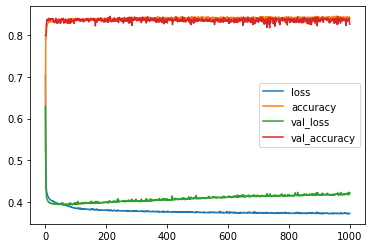

In [48]:
pd.DataFrame(model.history.history).plot()

<AxesSubplot:>

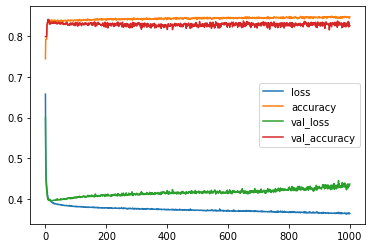

In [49]:
pd.DataFrame(model2.history.history).plot()

In [50]:
model.evaluate(X1_test, y_test, verbose=0)

[0.39941465854644775, 0.8270000219345093]

In [51]:
model2.evaluate(X2_test, y_test, verbose=0)

[0.40856608748435974, 0.8353333473205566]

In [57]:
y_pred = model.predict(X1_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 887us/step
[[2204  212]
 [ 307  277]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2416
           1       0.57      0.47      0.52       584

    accuracy                           0.83      3000
   macro avg       0.72      0.69      0.71      3000
weighted avg       0.82      0.83      0.82      3000



In [58]:
y_pred = model2.predict(X2_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 876us/step
[[2271  145]
 [ 349  235]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2416
           1       0.62      0.40      0.49       584

    accuracy                           0.84      3000
   macro avg       0.74      0.67      0.69      3000
weighted avg       0.82      0.84      0.82      3000



94/94 [==============================] - 0s 887us/step


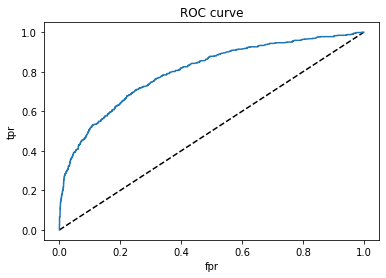

In [63]:
y_pred_proba = model.predict(X1_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [64]:
roc_auc_score(y_test, y_pred_proba)

0.8012763086274155

94/94 [==============================] - 0s 876us/step


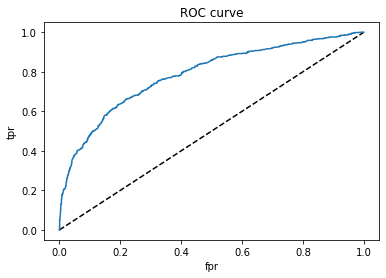

In [65]:
y2_pred_proba = model2.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y_test, y2_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [66]:
roc_auc_score(y_test, y2_pred_proba)

0.7852802804363603

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [76]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.6309717 , 2.40880936])

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [78]:
model2.fit(x = X2_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, class_weight={0:0.6309717 , 1:2.40880936}, use_multiprocessing = True)

Epoch 1/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7923 - val_loss: 0.5117 - val_accuracy: 0.7790
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7827 - val_loss: 0.5393 - val_accuracy: 0.7543
Epoch 3/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7734 - val_loss: 0.5159 - val_accuracy: 0.7505
Epoch 4/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7726 - val_loss: 0.5491 - val_accuracy: 0.7257
Epoch 5/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.7696 - val_loss: 0.5387 - val_accuracy: 0.7286
Epoch 6/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7676 - val_loss: 0.5699 - val_accuracy: 0.7162
Epoch 7/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7639 - val_loss: 0.5438 - val_accuracy: 0.7295
Epoch 

47/47 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7738 - val_loss: 0.5771 - val_accuracy: 0.7219
Epoch 59/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7714 - val_loss: 0.5715 - val_accuracy: 0.7286
Epoch 60/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7728 - val_loss: 0.5401 - val_accuracy: 0.7457
Epoch 61/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7723 - val_loss: 0.5705 - val_accuracy: 0.7200
Epoch 62/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7745 - val_loss: 0.5546 - val_accuracy: 0.7419
Epoch 63/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7733 - val_loss: 0.5677 - val_accuracy: 0.7276
Epoch 64/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7723 - val_loss: 0.5741 - val_accuracy: 0.7210
Epoch 65/1000

47/47 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7708 - val_loss: 0.5529 - val_accuracy: 0.7390
Epoch 116/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7741 - val_loss: 0.5712 - val_accuracy: 0.7257
Epoch 117/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7723 - val_loss: 0.5549 - val_accuracy: 0.7457
Epoch 118/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7734 - val_loss: 0.5472 - val_accuracy: 0.7476
Epoch 119/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7699 - val_loss: 0.5694 - val_accuracy: 0.7181
Epoch 120/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7745 - val_loss: 0.5700 - val_accuracy: 0.7286
Epoch 121/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7808 - val_loss: 0.5816 - val_accuracy: 0.7229
Epoch 1

Epoch 172/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7686 - val_loss: 0.5959 - val_accuracy: 0.7171
Epoch 173/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7768 - val_loss: 0.5794 - val_accuracy: 0.7219
Epoch 174/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7738 - val_loss: 0.5669 - val_accuracy: 0.7305
Epoch 175/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7787 - val_loss: 0.5678 - val_accuracy: 0.7305
Epoch 176/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7708 - val_loss: 0.5641 - val_accuracy: 0.7333
Epoch 177/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7758 - val_loss: 0.5792 - val_accuracy: 0.7248
Epoch 178/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7790 - val_loss: 0.5736 - val_accuracy:

Epoch 229/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.7756 - val_loss: 0.5677 - val_accuracy: 0.7257
Epoch 230/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7765 - val_loss: 0.5962 - val_accuracy: 0.7076
Epoch 231/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7776 - val_loss: 0.6109 - val_accuracy: 0.7019
Epoch 232/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7709 - val_loss: 0.5998 - val_accuracy: 0.7133
Epoch 233/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7714 - val_loss: 0.5866 - val_accuracy: 0.7171
Epoch 234/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7689 - val_loss: 0.5601 - val_accuracy: 0.7419
Epoch 235/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7751 - val_loss: 0.5618 - val_accuracy:

Epoch 286/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7733 - val_loss: 0.5664 - val_accuracy: 0.7457
Epoch 287/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7699 - val_loss: 0.5670 - val_accuracy: 0.7381
Epoch 288/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7810 - val_loss: 0.5687 - val_accuracy: 0.7362
Epoch 289/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7760 - val_loss: 0.5801 - val_accuracy: 0.7286
Epoch 290/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7815 - val_loss: 0.6245 - val_accuracy: 0.6990
Epoch 291/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7778 - val_loss: 0.5720 - val_accuracy: 0.7467
Epoch 292/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7755 - val_loss: 0.5719 - val_accuracy:

Epoch 343/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7753 - val_loss: 0.5827 - val_accuracy: 0.7381
Epoch 344/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7733 - val_loss: 0.6032 - val_accuracy: 0.7133
Epoch 345/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7790 - val_loss: 0.5770 - val_accuracy: 0.7390
Epoch 346/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7736 - val_loss: 0.5697 - val_accuracy: 0.7314
Epoch 347/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7778 - val_loss: 0.5723 - val_accuracy: 0.7476
Epoch 348/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7790 - val_loss: 0.5867 - val_accuracy: 0.7305
Epoch 349/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7718 - val_loss: 0.5721 - val_accuracy:

Epoch 400/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7746 - val_loss: 0.5868 - val_accuracy: 0.7267
Epoch 401/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7728 - val_loss: 0.5939 - val_accuracy: 0.7295
Epoch 402/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7723 - val_loss: 0.5926 - val_accuracy: 0.7219
Epoch 403/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7768 - val_loss: 0.5696 - val_accuracy: 0.7390
Epoch 404/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7770 - val_loss: 0.5807 - val_accuracy: 0.7219
Epoch 405/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7734 - val_loss: 0.5727 - val_accuracy: 0.7314
Epoch 406/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7810 - val_loss: 0.5824 - val_accuracy:

Epoch 457/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7773 - val_loss: 0.5829 - val_accuracy: 0.7286
Epoch 458/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7822 - val_loss: 0.5946 - val_accuracy: 0.7219
Epoch 459/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7746 - val_loss: 0.5980 - val_accuracy: 0.7219
Epoch 460/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7745 - val_loss: 0.5845 - val_accuracy: 0.7333
Epoch 461/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7738 - val_loss: 0.5643 - val_accuracy: 0.7457
Epoch 462/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7835 - val_loss: 0.5956 - val_accuracy: 0.7267
Epoch 463/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7788 - val_loss: 0.5767 - val_accuracy:

Epoch 514/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7805 - val_loss: 0.5838 - val_accuracy: 0.7524
Epoch 515/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7780 - val_loss: 0.6096 - val_accuracy: 0.7152
Epoch 516/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7763 - val_loss: 0.5947 - val_accuracy: 0.7190
Epoch 517/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7835 - val_loss: 0.6346 - val_accuracy: 0.6981
Epoch 518/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7780 - val_loss: 0.6010 - val_accuracy: 0.7248
Epoch 519/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7785 - val_loss: 0.5777 - val_accuracy: 0.7410
Epoch 520/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7827 - val_loss: 0.5902 - val_accuracy:

Epoch 571/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7790 - val_loss: 0.6089 - val_accuracy: 0.7238
Epoch 572/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7810 - val_loss: 0.5964 - val_accuracy: 0.7267
Epoch 573/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7743 - val_loss: 0.6005 - val_accuracy: 0.7267
Epoch 574/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7787 - val_loss: 0.5948 - val_accuracy: 0.7210
Epoch 575/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7758 - val_loss: 0.6033 - val_accuracy: 0.7210
Epoch 576/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7753 - val_loss: 0.5665 - val_accuracy: 0.7438
Epoch 577/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7776 - val_loss: 0.6359 - val_accuracy:

Epoch 628/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7782 - val_loss: 0.5862 - val_accuracy: 0.7362
Epoch 629/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7787 - val_loss: 0.5988 - val_accuracy: 0.7238
Epoch 630/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7787 - val_loss: 0.6039 - val_accuracy: 0.7248
Epoch 631/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7803 - val_loss: 0.6270 - val_accuracy: 0.7114
Epoch 632/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7780 - val_loss: 0.5924 - val_accuracy: 0.7343
Epoch 633/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7825 - val_loss: 0.6197 - val_accuracy: 0.7238
Epoch 634/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7864 - val_loss: 0.5974 - val_accuracy:

Epoch 685/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7793 - val_loss: 0.6062 - val_accuracy: 0.7276
Epoch 686/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7832 - val_loss: 0.6152 - val_accuracy: 0.7200
Epoch 687/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7802 - val_loss: 0.5752 - val_accuracy: 0.7448
Epoch 688/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7807 - val_loss: 0.5854 - val_accuracy: 0.7267
Epoch 689/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7718 - val_loss: 0.6043 - val_accuracy: 0.7333
Epoch 690/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7783 - val_loss: 0.5842 - val_accuracy: 0.7505
Epoch 691/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7834 - val_loss: 0.6034 - val_accuracy:

Epoch 742/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7795 - val_loss: 0.6045 - val_accuracy: 0.7057
Epoch 743/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7724 - val_loss: 0.5845 - val_accuracy: 0.7390
Epoch 744/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7830 - val_loss: 0.5862 - val_accuracy: 0.7400
Epoch 745/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.7755 - val_loss: 0.5927 - val_accuracy: 0.7229
Epoch 746/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7792 - val_loss: 0.5817 - val_accuracy: 0.7419
Epoch 747/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7795 - val_loss: 0.5891 - val_accuracy: 0.7419
Epoch 748/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7807 - val_loss: 0.5915 - val_accuracy:

Epoch 799/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7866 - val_loss: 0.5818 - val_accuracy: 0.7381
Epoch 800/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7818 - val_loss: 0.5982 - val_accuracy: 0.7343
Epoch 801/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7835 - val_loss: 0.6180 - val_accuracy: 0.7276
Epoch 802/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7783 - val_loss: 0.5946 - val_accuracy: 0.7476
Epoch 803/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7887 - val_loss: 0.6319 - val_accuracy: 0.7257
Epoch 804/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7753 - val_loss: 0.5922 - val_accuracy: 0.7276
Epoch 805/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7778 - val_loss: 0.5930 - val_accuracy:

Epoch 856/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7812 - val_loss: 0.5886 - val_accuracy: 0.7524
Epoch 857/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7877 - val_loss: 0.6126 - val_accuracy: 0.7324
Epoch 858/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7790 - val_loss: 0.6276 - val_accuracy: 0.7152
Epoch 859/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7837 - val_loss: 0.6309 - val_accuracy: 0.7238
Epoch 860/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7792 - val_loss: 0.6074 - val_accuracy: 0.7305
Epoch 861/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7793 - val_loss: 0.6318 - val_accuracy: 0.7190
Epoch 862/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7756 - val_loss: 0.6243 - val_accuracy:

Epoch 913/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7827 - val_loss: 0.6155 - val_accuracy: 0.7410
Epoch 914/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7792 - val_loss: 0.5738 - val_accuracy: 0.7457
Epoch 915/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7780 - val_loss: 0.5895 - val_accuracy: 0.7457
Epoch 916/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7855 - val_loss: 0.5848 - val_accuracy: 0.7390
Epoch 917/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7719 - val_loss: 0.5922 - val_accuracy: 0.7467
Epoch 918/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7758 - val_loss: 0.6242 - val_accuracy: 0.7210
Epoch 919/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7812 - val_loss: 0.5784 - val_accuracy:

Epoch 970/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7817 - val_loss: 0.6244 - val_accuracy: 0.7267
Epoch 971/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7810 - val_loss: 0.6079 - val_accuracy: 0.7333
Epoch 972/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7808 - val_loss: 0.5784 - val_accuracy: 0.7429
Epoch 973/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7859 - val_loss: 0.6157 - val_accuracy: 0.7267
Epoch 974/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7842 - val_loss: 0.6192 - val_accuracy: 0.7343
Epoch 975/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7815 - val_loss: 0.5945 - val_accuracy: 0.7438
Epoch 976/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7849 - val_loss: 0.6138 - val_accuracy:

<AxesSubplot:>

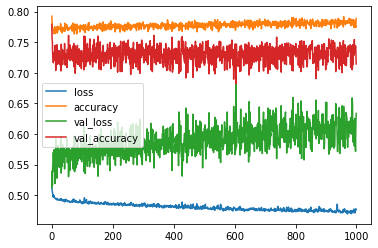

In [79]:
pd.DataFrame(model2.history.history).plot()

In [80]:
model2.evaluate(X2_test, y_test, verbose=0)

[0.6076679825782776, 0.721666693687439]

In [81]:
y2_pred = model2.predict(X2_test) > 0.5
print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

94/94 [==============================] - 0s 871us/step
[[1772  644]
 [ 191  393]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      2416
           1       0.38      0.67      0.48       584

    accuracy                           0.72      3000
   macro avg       0.64      0.70      0.65      3000
weighted avg       0.80      0.72      0.75      3000



94/94 [==============================] - 0s 903us/step


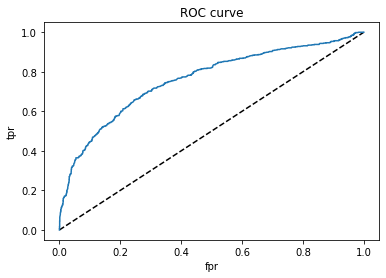

In [82]:
y2_pred_proba = model2.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y_test, y2_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [83]:
roc_auc_score(y_test, y2_pred_proba)

0.7596283055883154

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [88]:
model2.compile(optimizer = Adam(learning_rate = 0.005), loss = 'binary_crossentropy', metrics=['accuracy'])
model2.fit(x = X2_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, class_weight={0:0.6309717 , 1:2.40880936}, use_multiprocessing = True)

Epoch 1/1000
47/47 [==============================] - 1s 5ms/step - loss: 0.4897 - accuracy: 0.7615 - val_loss: 0.6102 - val_accuracy: 0.7438
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7657 - val_loss: 0.5709 - val_accuracy: 0.7571
Epoch 3/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7639 - val_loss: 0.5794 - val_accuracy: 0.7305
Epoch 4/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7699 - val_loss: 0.5818 - val_accuracy: 0.7362
Epoch 5/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7629 - val_loss: 0.5889 - val_accuracy: 0.7238
Epoch 6/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7703 - val_loss: 0.6073 - val_accuracy: 0.7048
Epoch 7/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7642 - val_loss: 0.5751 - val_accuracy: 0.7238
Epoch 

47/47 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7699 - val_loss: 0.5494 - val_accuracy: 0.7362
Epoch 59/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7714 - val_loss: 0.5950 - val_accuracy: 0.7286
Epoch 60/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7731 - val_loss: 0.5484 - val_accuracy: 0.7400
Epoch 61/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7647 - val_loss: 0.5637 - val_accuracy: 0.7305
Epoch 62/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7734 - val_loss: 0.5726 - val_accuracy: 0.7400
Epoch 63/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7662 - val_loss: 0.5569 - val_accuracy: 0.7390
Epoch 64/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7738 - val_loss: 0.5625 - val_accuracy: 0.7429
Epoch 65/1000

47/47 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7711 - val_loss: 0.5972 - val_accuracy: 0.7143
Epoch 116/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7607 - val_loss: 0.6095 - val_accuracy: 0.7095
Epoch 117/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7724 - val_loss: 0.5800 - val_accuracy: 0.7314
Epoch 118/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7750 - val_loss: 0.5816 - val_accuracy: 0.7267
Epoch 119/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7639 - val_loss: 0.6366 - val_accuracy: 0.7067
Epoch 120/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7513 - val_loss: 0.5185 - val_accuracy: 0.7705
Epoch 121/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7595 - val_loss: 0.5395 - val_accuracy: 0.7495
Epoch 1

Epoch 172/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7526 - val_loss: 0.5278 - val_accuracy: 0.7457
Epoch 173/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7657 - val_loss: 0.5655 - val_accuracy: 0.7238
Epoch 174/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7637 - val_loss: 0.5415 - val_accuracy: 0.7343
Epoch 175/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7734 - val_loss: 0.5949 - val_accuracy: 0.7076
Epoch 176/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7637 - val_loss: 0.5483 - val_accuracy: 0.7362
Epoch 177/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7627 - val_loss: 0.5294 - val_accuracy: 0.7419
Epoch 178/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7645 - val_loss: 0.5926 - val_accuracy:

Epoch 229/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7615 - val_loss: 0.5807 - val_accuracy: 0.7333
Epoch 230/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7771 - val_loss: 0.6094 - val_accuracy: 0.7038
Epoch 231/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7679 - val_loss: 0.5929 - val_accuracy: 0.7143
Epoch 232/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7798 - val_loss: 0.6321 - val_accuracy: 0.6771
Epoch 233/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7691 - val_loss: 0.6424 - val_accuracy: 0.6857
Epoch 234/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7634 - val_loss: 0.5430 - val_accuracy: 0.7429
Epoch 235/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7664 - val_loss: 0.5825 - val_accuracy:

Epoch 286/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7607 - val_loss: 0.5454 - val_accuracy: 0.7495
Epoch 287/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7661 - val_loss: 0.5680 - val_accuracy: 0.7333
Epoch 288/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7682 - val_loss: 0.5688 - val_accuracy: 0.7333
Epoch 289/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7612 - val_loss: 0.5259 - val_accuracy: 0.7590
Epoch 290/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.7672 - val_loss: 0.5557 - val_accuracy: 0.7505
Epoch 291/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7771 - val_loss: 0.6201 - val_accuracy: 0.6962
Epoch 292/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7666 - val_loss: 0.5928 - val_accuracy:

Epoch 343/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7713 - val_loss: 0.6040 - val_accuracy: 0.7238
Epoch 344/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7632 - val_loss: 0.5953 - val_accuracy: 0.7190
Epoch 345/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7699 - val_loss: 0.5989 - val_accuracy: 0.7143
Epoch 346/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7708 - val_loss: 0.5502 - val_accuracy: 0.7400
Epoch 347/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7682 - val_loss: 0.5586 - val_accuracy: 0.7371
Epoch 348/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7724 - val_loss: 0.5680 - val_accuracy: 0.7248
Epoch 349/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7667 - val_loss: 0.5878 - val_accuracy:

Epoch 400/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7639 - val_loss: 0.6066 - val_accuracy: 0.7190
Epoch 401/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7645 - val_loss: 0.6534 - val_accuracy: 0.6676
Epoch 402/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7679 - val_loss: 0.5744 - val_accuracy: 0.7248
Epoch 403/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7640 - val_loss: 0.5718 - val_accuracy: 0.7362
Epoch 404/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7719 - val_loss: 0.5608 - val_accuracy: 0.7371
Epoch 405/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7696 - val_loss: 0.5807 - val_accuracy: 0.7219
Epoch 406/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7734 - val_loss: 0.6068 - val_accuracy:

Epoch 457/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7624 - val_loss: 0.5771 - val_accuracy: 0.7190
Epoch 458/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7739 - val_loss: 0.5697 - val_accuracy: 0.7429
Epoch 459/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7622 - val_loss: 0.6450 - val_accuracy: 0.6819
Epoch 460/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7655 - val_loss: 0.5794 - val_accuracy: 0.7257
Epoch 461/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7676 - val_loss: 0.5526 - val_accuracy: 0.7476
Epoch 462/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7738 - val_loss: 0.6219 - val_accuracy: 0.6971
Epoch 463/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7755 - val_loss: 0.5804 - val_accuracy:

Epoch 514/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7736 - val_loss: 0.5745 - val_accuracy: 0.7371
Epoch 515/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7709 - val_loss: 0.5866 - val_accuracy: 0.7314
Epoch 516/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7790 - val_loss: 0.6140 - val_accuracy: 0.7086
Epoch 517/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7657 - val_loss: 0.6514 - val_accuracy: 0.6857
Epoch 518/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7751 - val_loss: 0.5912 - val_accuracy: 0.7200
Epoch 519/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7800 - val_loss: 0.6052 - val_accuracy: 0.7248
Epoch 520/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7771 - val_loss: 0.6231 - val_accuracy:

Epoch 571/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7724 - val_loss: 0.6098 - val_accuracy: 0.7133
Epoch 572/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7797 - val_loss: 0.6292 - val_accuracy: 0.6981
Epoch 573/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7687 - val_loss: 0.5924 - val_accuracy: 0.7276
Epoch 574/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7701 - val_loss: 0.6009 - val_accuracy: 0.7105
Epoch 575/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7642 - val_loss: 0.6159 - val_accuracy: 0.7143
Epoch 576/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.7682 - val_loss: 0.5643 - val_accuracy: 0.7419
Epoch 577/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7585 - val_loss: 0.6208 - val_accuracy:

Epoch 628/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7681 - val_loss: 0.5724 - val_accuracy: 0.7448
Epoch 629/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7708 - val_loss: 0.6290 - val_accuracy: 0.6943
Epoch 630/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7654 - val_loss: 0.5852 - val_accuracy: 0.7210
Epoch 631/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7664 - val_loss: 0.6143 - val_accuracy: 0.7105
Epoch 632/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7719 - val_loss: 0.6143 - val_accuracy: 0.7286
Epoch 633/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7758 - val_loss: 0.5887 - val_accuracy: 0.7190
Epoch 634/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7745 - val_loss: 0.6384 - val_accuracy:

Epoch 685/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7748 - val_loss: 0.6019 - val_accuracy: 0.7267
Epoch 686/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7768 - val_loss: 0.6165 - val_accuracy: 0.7190
Epoch 687/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7669 - val_loss: 0.5973 - val_accuracy: 0.7343
Epoch 688/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7708 - val_loss: 0.6053 - val_accuracy: 0.7210
Epoch 689/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7689 - val_loss: 0.6160 - val_accuracy: 0.7076
Epoch 690/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7647 - val_loss: 0.6007 - val_accuracy: 0.7238
Epoch 691/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7713 - val_loss: 0.6309 - val_accuracy:

Epoch 742/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7691 - val_loss: 0.5979 - val_accuracy: 0.7200
Epoch 743/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7652 - val_loss: 0.5841 - val_accuracy: 0.7238
Epoch 744/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7697 - val_loss: 0.6016 - val_accuracy: 0.7286
Epoch 745/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7721 - val_loss: 0.6226 - val_accuracy: 0.6981
Epoch 746/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7802 - val_loss: 0.6310 - val_accuracy: 0.7029
Epoch 747/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7738 - val_loss: 0.5979 - val_accuracy: 0.7248
Epoch 748/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7724 - val_loss: 0.5976 - val_accuracy:

Epoch 799/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7691 - val_loss: 0.6074 - val_accuracy: 0.7210
Epoch 800/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7686 - val_loss: 0.6001 - val_accuracy: 0.7248
Epoch 801/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7736 - val_loss: 0.5863 - val_accuracy: 0.7324
Epoch 802/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7689 - val_loss: 0.5896 - val_accuracy: 0.7419
Epoch 803/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7728 - val_loss: 0.6568 - val_accuracy: 0.6933
Epoch 804/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7672 - val_loss: 0.6001 - val_accuracy: 0.7343
Epoch 805/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7758 - val_loss: 0.6271 - val_accuracy:

Epoch 856/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7743 - val_loss: 0.5866 - val_accuracy: 0.7400
Epoch 857/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7694 - val_loss: 0.5902 - val_accuracy: 0.7210
Epoch 858/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7708 - val_loss: 0.6397 - val_accuracy: 0.7019
Epoch 859/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7758 - val_loss: 0.6137 - val_accuracy: 0.7076
Epoch 860/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7761 - val_loss: 0.6318 - val_accuracy: 0.7010
Epoch 861/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7666 - val_loss: 0.6321 - val_accuracy: 0.7038
Epoch 862/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7686 - val_loss: 0.5875 - val_accuracy:

Epoch 913/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.7780 - val_loss: 0.6220 - val_accuracy: 0.7114
Epoch 914/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7739 - val_loss: 0.5765 - val_accuracy: 0.7629
Epoch 915/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7731 - val_loss: 0.6076 - val_accuracy: 0.7352
Epoch 916/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7691 - val_loss: 0.6169 - val_accuracy: 0.7210
Epoch 917/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7718 - val_loss: 0.6409 - val_accuracy: 0.7010
Epoch 918/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7661 - val_loss: 0.5917 - val_accuracy: 0.7314
Epoch 919/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7721 - val_loss: 0.5796 - val_accuracy:

Epoch 970/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7711 - val_loss: 0.6421 - val_accuracy: 0.6990
Epoch 971/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7697 - val_loss: 0.6050 - val_accuracy: 0.7190
Epoch 972/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7768 - val_loss: 0.5563 - val_accuracy: 0.7533
Epoch 973/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7639 - val_loss: 0.5682 - val_accuracy: 0.7438
Epoch 974/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7756 - val_loss: 0.6187 - val_accuracy: 0.7276
Epoch 975/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.7723 - val_loss: 0.5981 - val_accuracy: 0.7429
Epoch 976/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7800 - val_loss: 0.5924 - val_accuracy:

<AxesSubplot:>

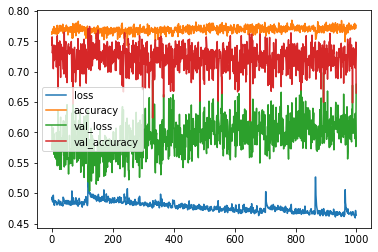

In [89]:
pd.DataFrame(model2.history.history).plot()

In [90]:
model2.evaluate(X2_test, y_test, verbose=0)

[0.7029983997344971, 0.6613333225250244]

In [91]:
y2_pred = model2.predict(X2_test) > 0.5
print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

94/94 [==============================] - 0s 903us/step
[[1557  859]
 [ 157  427]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      2416
           1       0.33      0.73      0.46       584

    accuracy                           0.66      3000
   macro avg       0.62      0.69      0.61      3000
weighted avg       0.80      0.66      0.70      3000



94/94 [==============================] - 0s 892us/step


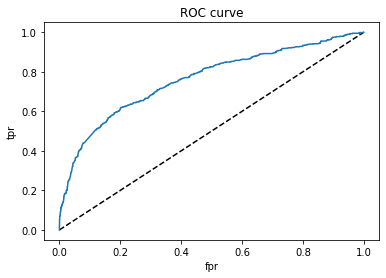

In [92]:
y2_pred_proba = model2.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y_test, y2_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [93]:
roc_auc_score(y_test, y2_pred_proba)

0.7607502494783636

### Add Dropout Layer

In [95]:
tf.random.set_seed(seed)

model2 = Sequential()

model2.add(Dense(int(X2_train.shape[1]*1.5), activation = 'relu', input_dim = X2_train.shape[1]))
model2.add(Dropout(0.5))

model2.add(Dense(int(X2_train.shape[1]*1.5), activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(X2_train.shape[1], activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(int(X2_train.shape[1]*0.5), activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1, activation="sigmoid"))

model2.compile(optimizer = Adam(learning_rate = 0.005), loss = 'binary_crossentropy', metrics=['accuracy'])

model2.fit(x = X2_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, class_weight={0:0.6309717 , 1:2.40880936}, use_multiprocessing = True)

Epoch 1/1000
47/47 [==============================] - 1s 5ms/step - loss: 0.7014 - accuracy: 0.6755 - val_loss: 0.6808 - val_accuracy: 0.7952
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.6983 - val_loss: 0.6773 - val_accuracy: 0.8200
Epoch 3/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6908 - val_loss: 0.6703 - val_accuracy: 0.7467
Epoch 4/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.7324 - val_loss: 0.6484 - val_accuracy: 0.7981
Epoch 5/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.7583 - val_loss: 0.6240 - val_accuracy: 0.8181
Epoch 6/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.7545 - val_loss: 0.6162 - val_accuracy: 0.8076
Epoch 7/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.7624 - val_loss: 0.5932 - val_accuracy: 0.7933
Epoch 

47/47 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.7593 - val_loss: 0.5590 - val_accuracy: 0.7676
Epoch 59/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7620 - val_loss: 0.5497 - val_accuracy: 0.7657
Epoch 60/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.7506 - val_loss: 0.5612 - val_accuracy: 0.7648
Epoch 61/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7461 - val_loss: 0.5729 - val_accuracy: 0.7324
Epoch 62/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6046 - accuracy: 0.7521 - val_loss: 0.5640 - val_accuracy: 0.7657
Epoch 63/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7566 - val_loss: 0.5421 - val_accuracy: 0.7762
Epoch 64/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7508 - val_loss: 0.5589 - val_accuracy: 0.7219
Epoch 65/1000

47/47 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7561 - val_loss: 0.5522 - val_accuracy: 0.7686
Epoch 116/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.7494 - val_loss: 0.5527 - val_accuracy: 0.7552
Epoch 117/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7482 - val_loss: 0.5541 - val_accuracy: 0.7590
Epoch 118/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.7518 - val_loss: 0.5312 - val_accuracy: 0.7648
Epoch 119/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.7504 - val_loss: 0.5610 - val_accuracy: 0.7648
Epoch 120/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7580 - val_loss: 0.5673 - val_accuracy: 0.7638
Epoch 121/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7571 - val_loss: 0.5390 - val_accuracy: 0.7800
Epoch 1

Epoch 172/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.7511 - val_loss: 0.5523 - val_accuracy: 0.7552
Epoch 173/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.7506 - val_loss: 0.5508 - val_accuracy: 0.7962
Epoch 174/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.7640 - val_loss: 0.5476 - val_accuracy: 0.7886
Epoch 175/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7548 - val_loss: 0.5641 - val_accuracy: 0.7438
Epoch 176/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.7548 - val_loss: 0.5532 - val_accuracy: 0.7819
Epoch 177/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.7539 - val_loss: 0.5469 - val_accuracy: 0.7810
Epoch 178/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.5981 - accuracy: 0.7548 - val_loss: 0.5322 - val_accuracy:

Epoch 229/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.7472 - val_loss: 0.5571 - val_accuracy: 0.7638
Epoch 230/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7662 - val_loss: 0.5772 - val_accuracy: 0.7752
Epoch 231/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7571 - val_loss: 0.5499 - val_accuracy: 0.7648
Epoch 232/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7560 - val_loss: 0.5520 - val_accuracy: 0.7724
Epoch 233/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6065 - accuracy: 0.7536 - val_loss: 0.5608 - val_accuracy: 0.7733
Epoch 234/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.7513 - val_loss: 0.5420 - val_accuracy: 0.7819
Epoch 235/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.7556 - val_loss: 0.5693 - val_accuracy:

Epoch 286/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7655 - val_loss: 0.5528 - val_accuracy: 0.7733
Epoch 287/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7603 - val_loss: 0.5615 - val_accuracy: 0.7733
Epoch 288/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6012 - accuracy: 0.7654 - val_loss: 0.5520 - val_accuracy: 0.7714
Epoch 289/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.7576 - val_loss: 0.5453 - val_accuracy: 0.7762
Epoch 290/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.7627 - val_loss: 0.5541 - val_accuracy: 0.7762
Epoch 291/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.7607 - val_loss: 0.5512 - val_accuracy: 0.7676
Epoch 292/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7553 - val_loss: 0.5515 - val_accuracy:

Epoch 343/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7691 - val_loss: 0.5548 - val_accuracy: 0.7714
Epoch 344/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7607 - val_loss: 0.5639 - val_accuracy: 0.7667
Epoch 345/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.7647 - val_loss: 0.5497 - val_accuracy: 0.7724
Epoch 346/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7521 - val_loss: 0.5486 - val_accuracy: 0.7724
Epoch 347/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7582 - val_loss: 0.5498 - val_accuracy: 0.7810
Epoch 348/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.7629 - val_loss: 0.5598 - val_accuracy: 0.7819
Epoch 349/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7592 - val_loss: 0.5564 - val_accuracy:

Epoch 400/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7563 - val_loss: 0.5518 - val_accuracy: 0.7438
Epoch 401/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.7590 - val_loss: 0.5583 - val_accuracy: 0.7562
Epoch 402/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7659 - val_loss: 0.5646 - val_accuracy: 0.7581
Epoch 403/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.7711 - val_loss: 0.5485 - val_accuracy: 0.7676
Epoch 404/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7617 - val_loss: 0.5502 - val_accuracy: 0.7552
Epoch 405/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7632 - val_loss: 0.5446 - val_accuracy: 0.7581
Epoch 406/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.7689 - val_loss: 0.5427 - val_accuracy:

Epoch 457/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7576 - val_loss: 0.5667 - val_accuracy: 0.7590
Epoch 458/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.7625 - val_loss: 0.5542 - val_accuracy: 0.7657
Epoch 459/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7585 - val_loss: 0.5592 - val_accuracy: 0.7638
Epoch 460/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.5952 - accuracy: 0.7597 - val_loss: 0.5533 - val_accuracy: 0.7686
Epoch 461/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6039 - accuracy: 0.7531 - val_loss: 0.5823 - val_accuracy: 0.7581
Epoch 462/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7666 - val_loss: 0.5517 - val_accuracy: 0.7648
Epoch 463/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.7622 - val_loss: 0.5615 - val_accuracy:

Epoch 514/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7724 - val_loss: 0.5554 - val_accuracy: 0.7781
Epoch 515/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.7644 - val_loss: 0.5611 - val_accuracy: 0.7743
Epoch 516/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.7679 - val_loss: 0.5524 - val_accuracy: 0.7695
Epoch 517/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.7728 - val_loss: 0.5552 - val_accuracy: 0.7838
Epoch 518/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.7676 - val_loss: 0.5485 - val_accuracy: 0.7867
Epoch 519/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.7691 - val_loss: 0.5535 - val_accuracy: 0.7914
Epoch 520/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7674 - val_loss: 0.5619 - val_accuracy:

Epoch 571/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7560 - val_loss: 0.5675 - val_accuracy: 0.7448
Epoch 572/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7568 - val_loss: 0.5457 - val_accuracy: 0.7695
Epoch 573/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.7610 - val_loss: 0.5571 - val_accuracy: 0.7724
Epoch 574/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.7576 - val_loss: 0.5521 - val_accuracy: 0.7571
Epoch 575/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7629 - val_loss: 0.5655 - val_accuracy: 0.7524
Epoch 576/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7630 - val_loss: 0.5616 - val_accuracy: 0.7514
Epoch 577/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.7615 - val_loss: 0.5626 - val_accuracy:

Epoch 628/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.7709 - val_loss: 0.5506 - val_accuracy: 0.7657
Epoch 629/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.7681 - val_loss: 0.5464 - val_accuracy: 0.7686
Epoch 630/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7635 - val_loss: 0.5471 - val_accuracy: 0.7629
Epoch 631/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7662 - val_loss: 0.5641 - val_accuracy: 0.7619
Epoch 632/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7608 - val_loss: 0.5574 - val_accuracy: 0.7629
Epoch 633/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7661 - val_loss: 0.5622 - val_accuracy: 0.7638
Epoch 634/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7650 - val_loss: 0.5357 - val_accuracy:

Epoch 685/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7612 - val_loss: 0.5646 - val_accuracy: 0.7514
Epoch 686/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7576 - val_loss: 0.5697 - val_accuracy: 0.7371
Epoch 687/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.7541 - val_loss: 0.5656 - val_accuracy: 0.7352
Epoch 688/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7556 - val_loss: 0.5523 - val_accuracy: 0.7533
Epoch 689/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.7571 - val_loss: 0.5577 - val_accuracy: 0.7467
Epoch 690/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7573 - val_loss: 0.5527 - val_accuracy: 0.7581
Epoch 691/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7639 - val_loss: 0.5444 - val_accuracy:

Epoch 742/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7654 - val_loss: 0.5387 - val_accuracy: 0.7610
Epoch 743/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.7661 - val_loss: 0.5556 - val_accuracy: 0.7600
Epoch 744/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7635 - val_loss: 0.5554 - val_accuracy: 0.7629
Epoch 745/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.7570 - val_loss: 0.5341 - val_accuracy: 0.7686
Epoch 746/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.7585 - val_loss: 0.5419 - val_accuracy: 0.7667
Epoch 747/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.7639 - val_loss: 0.5502 - val_accuracy: 0.7676
Epoch 748/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7640 - val_loss: 0.5409 - val_accuracy:

Epoch 799/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7575 - val_loss: 0.5368 - val_accuracy: 0.7762
Epoch 800/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.7558 - val_loss: 0.5537 - val_accuracy: 0.7543
Epoch 801/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.7624 - val_loss: 0.5671 - val_accuracy: 0.7552
Epoch 802/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.7652 - val_loss: 0.5564 - val_accuracy: 0.7590
Epoch 803/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.7708 - val_loss: 0.5470 - val_accuracy: 0.7819
Epoch 804/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7701 - val_loss: 0.5672 - val_accuracy: 0.7733
Epoch 805/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7666 - val_loss: 0.5540 - val_accuracy:

Epoch 856/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.5984 - accuracy: 0.7645 - val_loss: 0.5429 - val_accuracy: 0.8038
Epoch 857/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7647 - val_loss: 0.5398 - val_accuracy: 0.7895
Epoch 858/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7615 - val_loss: 0.5514 - val_accuracy: 0.7962
Epoch 859/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7637 - val_loss: 0.5595 - val_accuracy: 0.7495
Epoch 860/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7706 - val_loss: 0.5601 - val_accuracy: 0.7933
Epoch 861/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.7603 - val_loss: 0.5469 - val_accuracy: 0.7895
Epoch 862/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.7645 - val_loss: 0.5669 - val_accuracy:

Epoch 913/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.7635 - val_loss: 0.5380 - val_accuracy: 0.8019
Epoch 914/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7704 - val_loss: 0.5531 - val_accuracy: 0.7800
Epoch 915/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7645 - val_loss: 0.5450 - val_accuracy: 0.7943
Epoch 916/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7708 - val_loss: 0.5395 - val_accuracy: 0.7933
Epoch 917/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.7645 - val_loss: 0.5515 - val_accuracy: 0.7762
Epoch 918/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7588 - val_loss: 0.5517 - val_accuracy: 0.7762
Epoch 919/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7578 - val_loss: 0.5540 - val_accuracy:

Epoch 970/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7721 - val_loss: 0.5589 - val_accuracy: 0.7657
Epoch 971/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.7602 - val_loss: 0.5728 - val_accuracy: 0.7543
Epoch 972/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7629 - val_loss: 0.5560 - val_accuracy: 0.7543
Epoch 973/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7610 - val_loss: 0.5487 - val_accuracy: 0.7552
Epoch 974/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.7613 - val_loss: 0.5458 - val_accuracy: 0.7781
Epoch 975/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7613 - val_loss: 0.5751 - val_accuracy: 0.7581
Epoch 976/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.7652 - val_loss: 0.5715 - val_accuracy:

<AxesSubplot:>

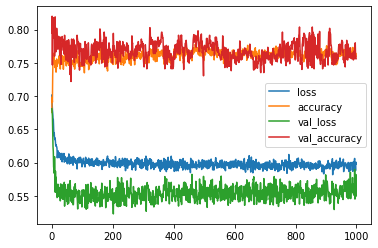

In [96]:
pd.DataFrame(model2.history.history).plot()

In [97]:
model2.evaluate(X2_test, y_test, verbose=0)

[0.54409259557724, 0.7540000081062317]

In [98]:
y2_pred = model2.predict(X2_test) > 0.5
print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

94/94 [==============================] - 0s 892us/step
[[1862  554]
 [ 184  400]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2416
           1       0.42      0.68      0.52       584

    accuracy                           0.75      3000
   macro avg       0.66      0.73      0.68      3000
weighted avg       0.81      0.75      0.77      3000



94/94 [==============================] - 0s 871us/step


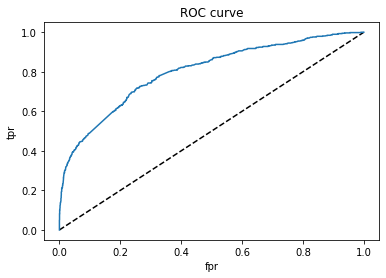

In [99]:
y2_pred_proba = model2.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y_test, y2_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [100]:
roc_auc_score(y_test, y2_pred_proba)

0.7992677243037285

### Add Early Stop

#### Monitor the "val_loss" as metric

In [101]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)
model2.fit(x = X2_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, class_weight={0:0.6309717 , 1:2.40880936}, use_multiprocessing = True, callbacks = [early_stop])

Epoch 1/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.7516 - val_loss: 0.5678 - val_accuracy: 0.7429
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.7536 - val_loss: 0.5678 - val_accuracy: 0.7495
Epoch 3/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7620 - val_loss: 0.5688 - val_accuracy: 0.7495
Epoch 4/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.7691 - val_loss: 0.5634 - val_accuracy: 0.7514
Epoch 5/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7709 - val_loss: 0.5450 - val_accuracy: 0.7714
Epoch 6/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.7713 - val_loss: 0.5570 - val_accuracy: 0.7638
Epoch 7/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.7649 - val_loss: 0.5526 - val_accuracy: 0.7676
Epoch 

47/47 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.7697 - val_loss: 0.5581 - val_accuracy: 0.7705
Epoch 59/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7655 - val_loss: 0.5627 - val_accuracy: 0.7790
Epoch 60/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7682 - val_loss: 0.5470 - val_accuracy: 0.7943
Epoch 61/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.7637 - val_loss: 0.5678 - val_accuracy: 0.7914
Epoch 62/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7576 - val_loss: 0.5587 - val_accuracy: 0.7667
Epoch 62: early stopping


<AxesSubplot:>

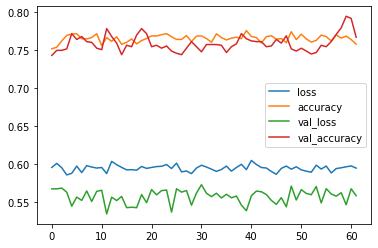

In [102]:
pd.DataFrame(model2.history.history).plot()

In [103]:
model2.evaluate(X2_test, y_test, verbose=0)

[0.5298358798027039, 0.784333348274231]

In [104]:
y2_pred = model2.predict(X2_test) > 0.5
print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

94/94 [==============================] - 0s 930us/step
[[1999  417]
 [ 230  354]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2416
           1       0.46      0.61      0.52       584

    accuracy                           0.78      3000
   macro avg       0.68      0.72      0.69      3000
weighted avg       0.81      0.78      0.79      3000



94/94 [==============================] - 0s 903us/step


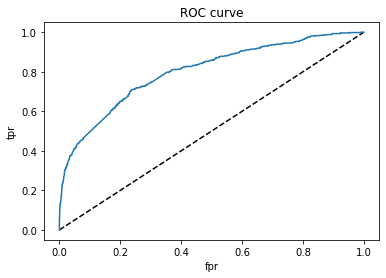

In [105]:
y2_pred_proba = model2.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y_test, y2_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [106]:
roc_auc_score(y_test, y2_pred_proba)

0.8010449032704345

#### Monitor the "val_recall" as metric

In [108]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", verbose = 1, patience = 50, restore_best_weights = True)
model2.fit(x = X2_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, class_weight={0:0.6309717 , 1:2.40880936}, use_multiprocessing = True, callbacks = [early_stop])

Epoch 1/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.7666 - val_loss: 0.5589 - val_accuracy: 0.7590
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7598 - val_loss: 0.5511 - val_accuracy: 0.7638
Epoch 3/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.7593 - val_loss: 0.5758 - val_accuracy: 0.7610
Epoch 4/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.7692 - val_loss: 0.5556 - val_accuracy: 0.7619
Epoch 5/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.7639 - val_loss: 0.5614 - val_accuracy: 0.7600
Epoch 6/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7677 - val_loss: 0.5434 - val_accuracy: 0.7562
Epoch 7/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.7597 - val_loss: 0.5619 - val_accuracy: 0.7610
Epoch 

47/47 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.7677 - val_loss: 0.5580 - val_accuracy: 0.7600
Epoch 59/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5983 - accuracy: 0.7608 - val_loss: 0.5516 - val_accuracy: 0.7619
Epoch 60/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7640 - val_loss: 0.5492 - val_accuracy: 0.7571
Epoch 61/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.7687 - val_loss: 0.5604 - val_accuracy: 0.7629
Epoch 62/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.7694 - val_loss: 0.5798 - val_accuracy: 0.7619
Epoch 63/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7703 - val_loss: 0.5562 - val_accuracy: 0.7705
Epoch 64/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7662 - val_loss: 0.5695 - val_accuracy: 0.7743
Epoch 65/1000

<AxesSubplot:>

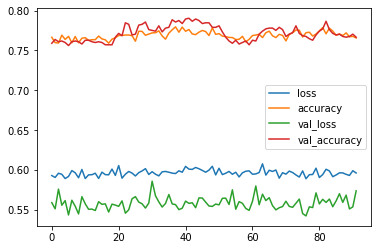

In [109]:
pd.DataFrame(model2.history.history).plot()

In [110]:
model2.evaluate(X2_test, y_test, verbose=0)

[0.5554565191268921, 0.7823333144187927]

In [111]:
y2_pred = model2.predict(X2_test) > 0.5
print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

94/94 [==============================] - 0s 919us/step
[[1978  438]
 [ 215  369]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2416
           1       0.46      0.63      0.53       584

    accuracy                           0.78      3000
   macro avg       0.68      0.73      0.69      3000
weighted avg       0.82      0.78      0.79      3000



94/94 [==============================] - 0s 909us/step


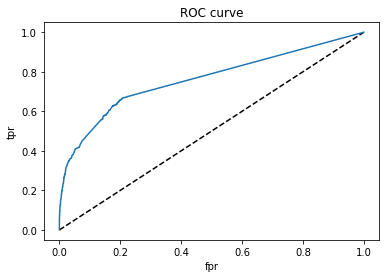

In [112]:
y2_pred_proba = model2.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y_test, y2_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [113]:
roc_auc_score(y_test, y2_pred_proba)

0.7608335270570625

## GridSearchCV

In [132]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(int(X2_train.shape[1]*1.5), activation = 'relu', input_dim = X2_train.shape[1]))
    classifier.add(Dropout(0.5))

    classifier.add(Dense(int(X2_train.shape[1]*1.5), activation = 'relu'))
    classifier.add(Dropout(0.5))

    classifier.add(Dense(X2_train.shape[1], activation = 'relu'))
    classifier.add(Dropout(0.5))

    classifier.add(Dense(int(X2_train.shape[1]*0.5), activation = 'relu'))
    classifier.add(Dropout(0.5))
    
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [133]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)

In [134]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.15, epochs = 100, class_weight={0:0.6309717 , 1:2.40880936}, use_multiprocessing = True)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X2_train, y_train, callbacks = [early_stop])

C:\Users\ertad\AppData\Local\Temp\ipykernel_25220\2780541308.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.15, epochs = 100, class_weight={0:0.6309717 , 1:2.40880936}, use_multiprocessing = True)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/100
186/186 [==============================] - 1s 2ms/step - loss: 0.6982 - accuracy: 0.6704 - val_loss: 0.6822 - val_accuracy: 0.8019
Epoch 2/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.7106 - val_loss: 0.6736 - val_accuracy: 0.7981
Epoch 3/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6447 - val_loss: 0.6124 - val_accuracy: 0.7229
Epoch 4/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.5578 - val_loss: 0.6066 - val_accuracy: 0.7371
Epoch 5/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.5721 - val_loss: 0.5754 - val_accuracy: 0.7505
Epoch 6/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.5918 - val_loss: 0.6194 - val_accuracy: 0.6848
Epoch 7/100
186/186 [==============================] - 0s 2ms/step - loss: 0.631

186/186 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7745 - val_loss: 0.4966 - val_accuracy: 0.8200
Epoch 58/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.7845 - val_loss: 0.5082 - val_accuracy: 0.8057
Epoch 59/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7766 - val_loss: 0.5865 - val_accuracy: 0.8086
Epoch 60/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.7721 - val_loss: 0.6094 - val_accuracy: 0.8152
Epoch 61/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7913 - val_loss: 0.5590 - val_accuracy: 0.8219
Epoch 62/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.7854 - val_loss: 0.5484 - val_accuracy: 0.8076
Epoch 63/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7842 - val_loss: 0.5385 - val_accuracy: 0.8067
Epoch

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001AD8E194C40>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [135]:
grid_model.best_score_

0.8212857142857144

In [136]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [137]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
5,0.821286,0.013772,1,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
1,0.818429,0.009141,2,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
21,0.815571,0.014303,3,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
9,0.813429,0.007106,4,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
17,0.810714,0.016055,5,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
13,0.805571,0.010902,6,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
11,0.785000,0.022447,7,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
20,0.784714,0.013004,8,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
23,0.779000,0.019870,9,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
19,0.773714,0.035918,10,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."


In [138]:
y_pred = grid_model.predict(X2_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 887us/step
[[2224  192]
 [ 311  273]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2416
           1       0.59      0.47      0.52       584

    accuracy                           0.83      3000
   macro avg       0.73      0.69      0.71      3000
weighted avg       0.82      0.83      0.82      3000



94/94 [==============================] - 0s 871us/step


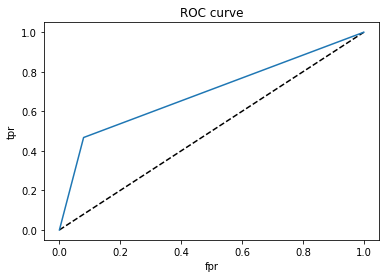

In [140]:
y_pred_proba = grid_model.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [141]:
roc_auc_score(y_test, y_pred_proba)

0.6939977773745805

# Final Model and Model Deployment

In [146]:
pickle.dump(column_trans2, open("column_trans", 'wb'))

In [147]:
tf.random.set_seed(seed)

model2 = Sequential()

model2.add(Dense(int(X2_train.shape[1]*1.5), activation = 'relu', input_dim = X2_train.shape[1]))
model2.add(Dropout(0.5))

model2.add(Dense(int(X2_train.shape[1]*1.5), activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(X2_train.shape[1], activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(int(X2_train.shape[1]*0.5), activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1, activation="sigmoid"))

model2.compile(optimizer = Adam(learning_rate = 0.005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [148]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)

In [149]:
model2.fit(x = X2_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, class_weight={0:0.6309717 , 1:2.40880936}, callbacks = [early_stop])

Epoch 1/1000
47/47 [==============================] - 1s 5ms/step - loss: 0.7014 - accuracy: 0.6755 - val_loss: 0.6808 - val_accuracy: 0.7952
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.6983 - val_loss: 0.6773 - val_accuracy: 0.8200
Epoch 3/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6908 - val_loss: 0.6703 - val_accuracy: 0.7467
Epoch 4/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.7324 - val_loss: 0.6484 - val_accuracy: 0.7981
Epoch 5/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.7583 - val_loss: 0.6240 - val_accuracy: 0.8181
Epoch 6/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.7545 - val_loss: 0.6162 - val_accuracy: 0.8076
Epoch 7/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.7624 - val_loss: 0.5932 - val_accuracy: 0.7933
Epoch 

47/47 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.7593 - val_loss: 0.5590 - val_accuracy: 0.7676
Epoch 59/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7620 - val_loss: 0.5497 - val_accuracy: 0.7657
Epoch 60/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.7506 - val_loss: 0.5612 - val_accuracy: 0.7648
Epoch 61/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6006 - accuracy: 0.7461 - val_loss: 0.5729 - val_accuracy: 0.7324
Epoch 62/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.7521 - val_loss: 0.5640 - val_accuracy: 0.7657
Epoch 63/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7566 - val_loss: 0.5421 - val_accuracy: 0.7762
Epoch 64/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7508 - val_loss: 0.5589 - val_accuracy: 0.7219
Epoch 65/1000

47/47 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7561 - val_loss: 0.5522 - val_accuracy: 0.7686
Epoch 116/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.7494 - val_loss: 0.5527 - val_accuracy: 0.7552
Epoch 117/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7482 - val_loss: 0.5541 - val_accuracy: 0.7590
Epoch 118/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.7518 - val_loss: 0.5312 - val_accuracy: 0.7648
Epoch 119/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.7504 - val_loss: 0.5610 - val_accuracy: 0.7648
Epoch 120/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.7580 - val_loss: 0.5673 - val_accuracy: 0.7638
Epoch 121/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7571 - val_loss: 0.5390 - val_accuracy: 0.7800
Epoch 1

In [151]:
model2.save('model_final.h5')

## Prediction

In [154]:
model_final = load_model('model_final.h5')
transform_features = pickle.load(open("column_trans", "rb"))

In [163]:
single_sample = df[important_features2].iloc[6:7, :]
single_sample

,Gender,Geography,IsActiveMember,Balance_cat,Age
6,Male,France,1,zero,50


In [164]:
single_sample = transform_features.transform(single_sample)
single_sample

array([[0.       , 1.       , 1.       , 0.       , 0.       , 0.       ,
        1.       , 0.       , 0.       , 0.       , 1.       , 1.0565818]])

In [165]:
(model_final.predict(single_sample) > 0.5).astype("int32")

1/1 [==============================] - 0s 14ms/step


array([[0]])

In [166]:
df["Exited"].iloc[6]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___